In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter, OrderedDict
import seaborn as sns
import sys
sns.set()

In [13]:
sys.path.insert(1, '../../src')

DATAPATH = '../../data_chromosome'

METADATAPATH = DATAPATH + '/raw_original_data/metadatos_v2.0.csv'

PLOT_PATH = DATAPATH + '/plots/report_plots/'

In [21]:
def generate_csv():
    """
    This function generates a real dataset using the txt given and saves it as a csv.
    :return:
    """
    data = pd.DataFrame(
        columns=['sampleID', 'donor_sex', 'donor_age_at_diagnosis', 'histology_tier1', 'histology_tier2',
                 'tumor_stage1', 'tumor_stage2'])

    with open(METADATAPATH.replace('.csv','.txt')) as f:
        for l in f:
            words = l.split()
            id = words[0]
            sex = words[1]
            age = words[2]
            tier1 = words[3]
            tier2 = words[4]
            tumor_stage1 = '_'.join(words[5:7])
            tumor_stage2 = '_'.join(words[8:])
            data = data.append({'sampleID': id, 'donor_sex': sex, 'donor_age_at_diagnosis': age,
                                'histology_tier1': tier1, 'histology_tier2': tier2,
                                'tumor_stage1': tumor_stage1, 'tumor_stage2': tumor_stage2}, ignore_index=True)

    data = data.drop(data.index[0])

    data.to_csv(METADATAPATH, index=False)

### Histologies

In [30]:
metadata = pd.read_csv(METADATAPATH)
pd.crosstab(metadata.histology_tier2, metadata.histology_tier1)

histology_tier1,ECTODERM,ENDODERM,MESODERM,NEURAL_CREST
histology_tier2,,,,
Biliary,0,34,0,0
Bladder,0,23,0,0
Bone/SoftTissue,0,0,92,0
Breast,209,0,0,0
CNS,0,0,0,261
Cervix,0,0,20,0
Colon/Rectum,0,60,0,0
Esophagus,0,87,0,0
Head/Neck,0,0,56,0


In [ ]:
def plot_count_bar(df,columns,name):
    for col in columns:
        plt.figure(figsize=(20, 10))
        values = df[col].values
        d = Counter(values)
        factor = 1.0 #/ sum(d.itervalues())
        D = {k: v * factor for k, v in d.iteritems()}
        plt.bar(range(len(D)), list(D.values()))
        plt.xticks(range(len(D)), list(D.keys()), rotation=30)
        plt.title(col)
        

In [31]:
histologies = ['histology_tier_1','histology_tier2']

In [60]:
def describe(df):
    """
    This function prints a report of the metadata and the representative plots
    :param df:
    :return:
    """
    print 'Dataset:'
    print df.head()
    print 'Shape:'
    print df.shape
    df = df.dropna()
    for col in df.columns:
        # don't print sample ID
        if col == 'sampleID':
            continue

        plt.figure(figsize=(20, 10))

        values = df[col].values
        if col == 'donor_age_at_diagnosis':
            lower, higher = df['donor_age_at_diagnosis'].min(), df['donor_age_at_diagnosis'].max()
            n_bins = 20
            edges = range(int(lower), int(higher),int((higher - lower) / n_bins))  # the number of edges is 8
            lbs = ['(%d, %d]' % (edges[i], edges[i + 1]) for i in range(len(edges) - 2)]
            values = pd.cut(df.donor_age_at_diagnosis, bins=n_bins + 1, labels=lbs, include_lowest=True)

        d = Counter(values)
        factor = 1.0 #/ sum(d.itervalues())
        D = {k: v * factor for k, v in d.iteritems()}

        if col == 'donor_age_at_diagnosis':
            D = OrderedDict(
                (k, v) for k, v in sorted(D.iteritems(), key=lambda (k, v): (int(k[1:-1].split(',')[0]), v)))

        sns.barplot(range(len(D)), list(D.values()))
        plt.xticks(range(len(D)), list(D.keys()), rotation=30)
        plt.title(col)

        plt.savefig(PLOT_PATH + 'barplot_' + col)


Dataset:
                               sampleID donor_sex  donor_age_at_diagnosis  \
0  f393ba16-9361-5df4-e040-11ac0d4844e8    female                    61.0   
1  f393baf9-2710-9203-e040-11ac0d484504    female                    41.0   
2  f393bafd-1baa-e5f4-e040-11ac0d48450b    female                    39.0   
3  f393bafe-c99f-3725-e040-11ac0d484514    female                    34.0   
4  f393bafe-7503-5c45-e040-11ac0d484511    female                    59.0   

  histology_tier1 histology_tier2    tumor_stage1  tumor_stage2  
0        ECTODERM          Breast  Primary_tumour  solid_tissue  
1        ECTODERM          Breast  Primary_tumour  solid_tissue  
2        ECTODERM          Breast  Primary_tumour  solid_tissue  
3        ECTODERM          Breast  Primary_tumour  solid_tissue  
4        ECTODERM          Breast  Primary_tumour  solid_tissue  
Shape:
(2586, 7)


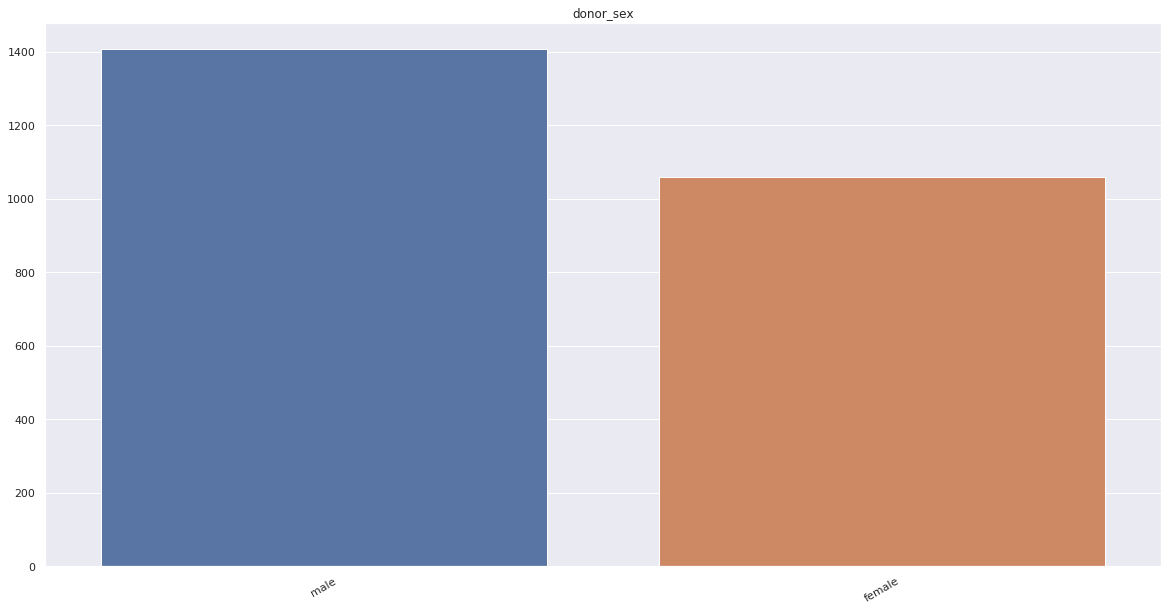

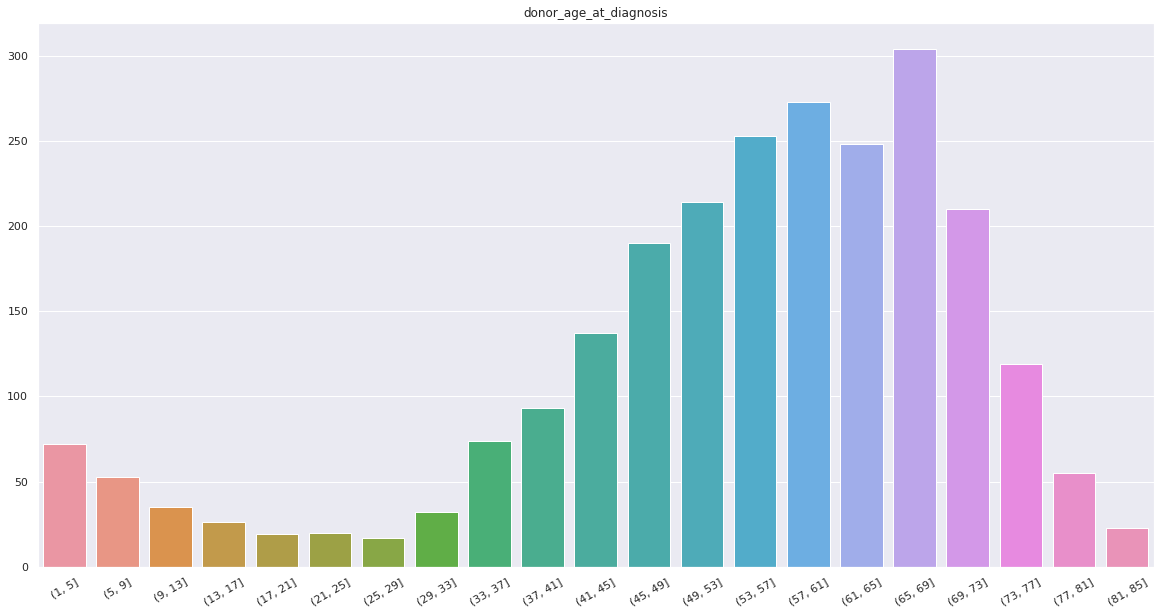

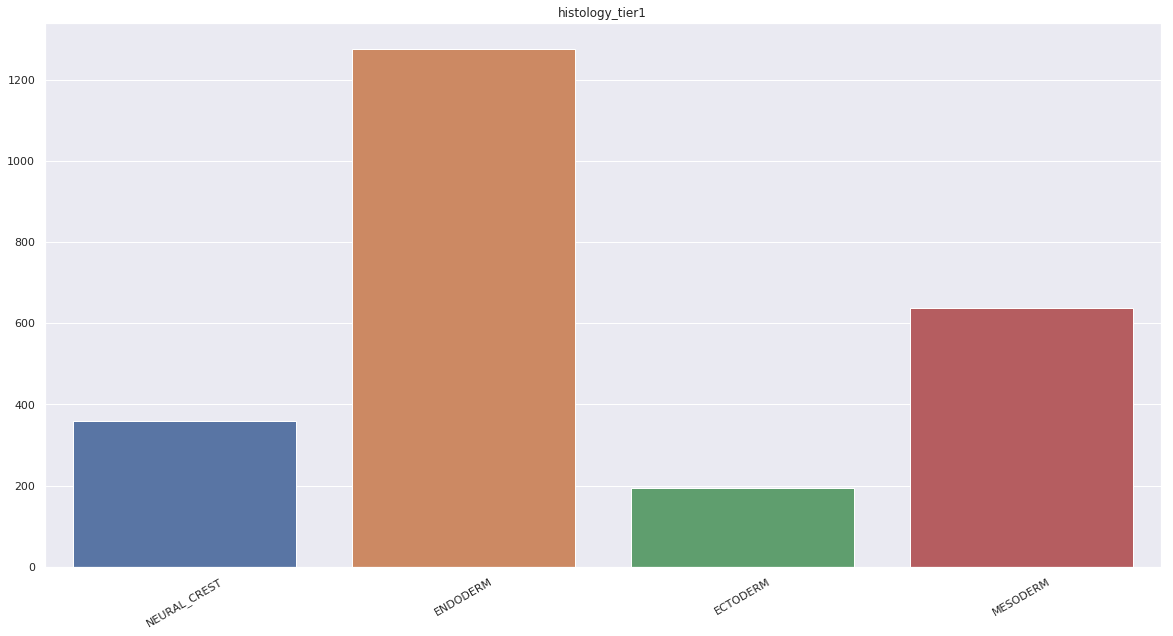

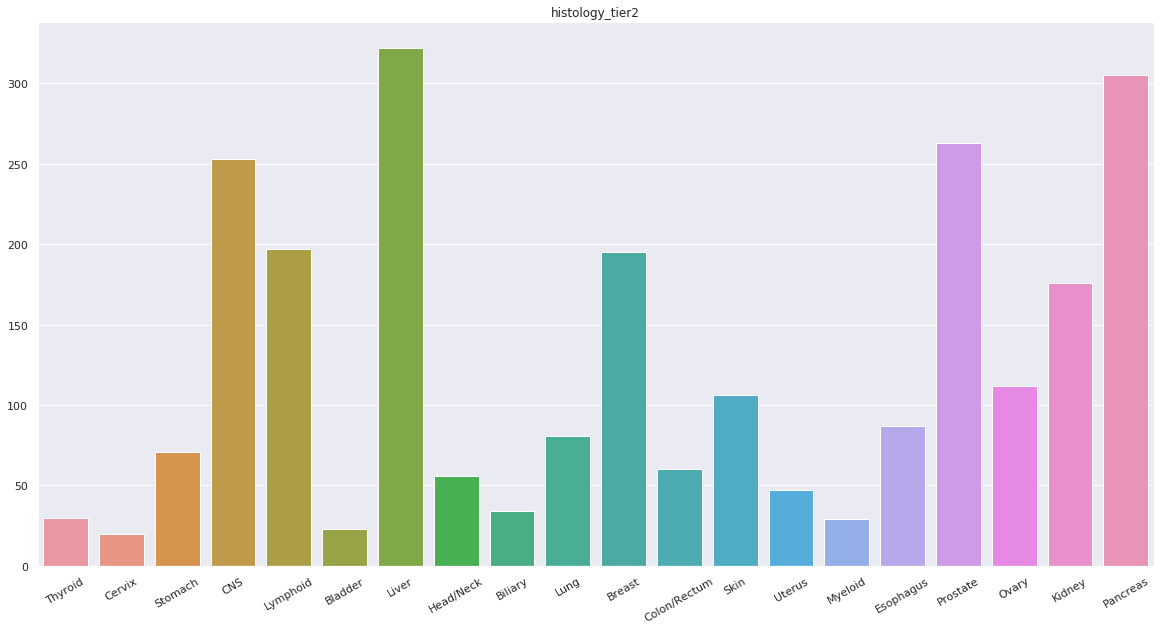

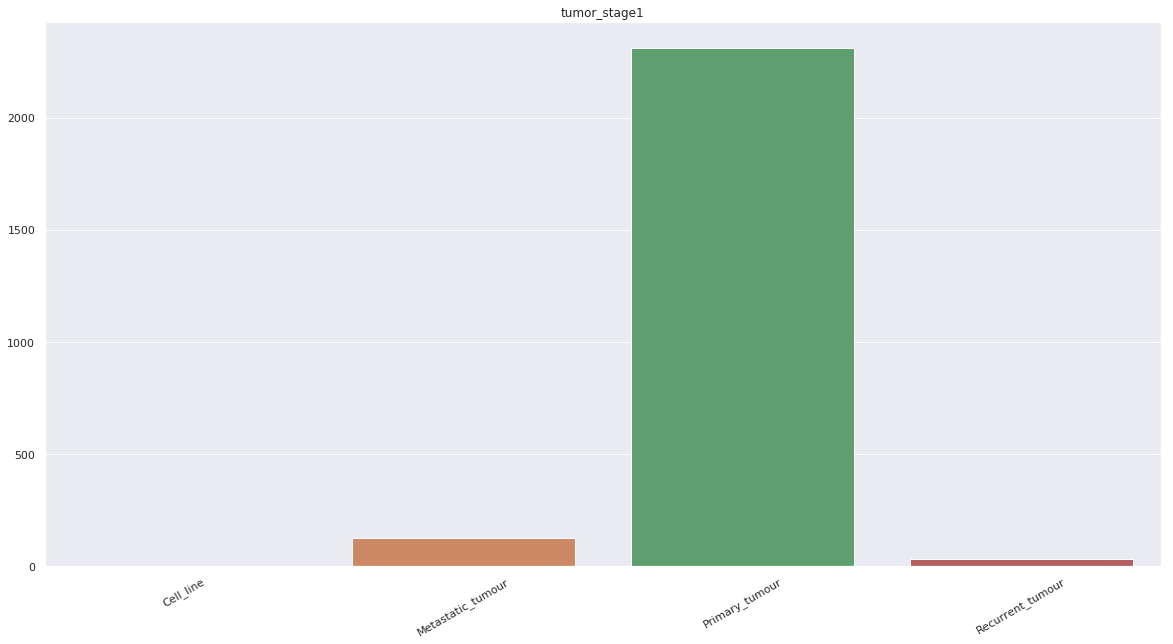

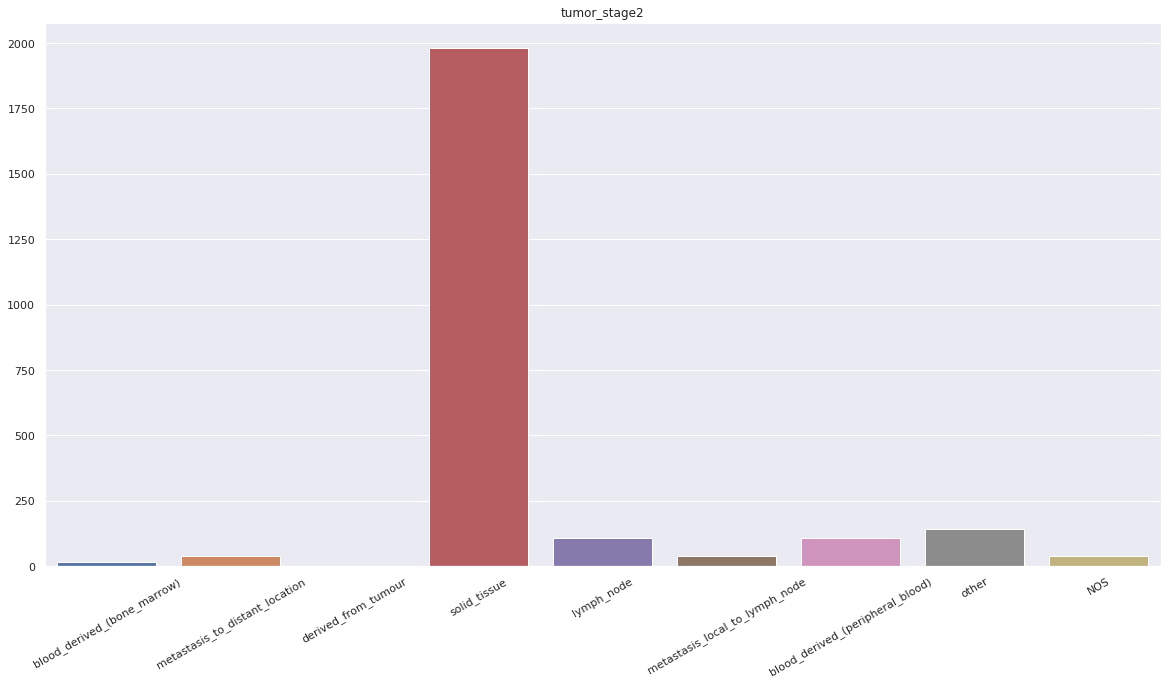

In [61]:
describe(metadata)

### Donor age and nans

In [22]:
def study_donor_age_vs_histology(df):
    """
    This function plots the counting  of values with nans of the donor age features and the age per histology.
    """
    df_nans = df[df.isnull().any(axis=1)]
    plt.figure(figsize=(15, 10))
    values = df_nans['histology_tier1'].values
    d = Counter(values)
    factor = 1.0 #/ sum(d.itervalues())
    D = {k: v * factor for k, v in d.iteritems()}
    sns.barplot(range(len(D)), list(D.values()))
    plt.xticks(range(len(D)), list(D.keys()), rotation=30)
    plt.title('Values with nan per histology')
    name = 'age_vs_histology_nans'
    plt.savefig(PLOT_PATH + name)

    df.dropna(inplace=True)
    df.donor_age_at_diagnosis = df.donor_age_at_diagnosis.astype(int)
    lower, higher = df['donor_age_at_diagnosis'].min(), df['donor_age_at_diagnosis'].max()
    n_bins = 20
    edges = range(lower, higher, (higher - lower) / n_bins)  # the number of edges is 8
    lbs = ['(%d, %d]' % (edges[i], edges[i + 1]) for i in range(len(edges) - 2)]
    values = pd.cut(df.donor_age_at_diagnosis, bins=n_bins + 1, labels=lbs, include_lowest=True)
    cross_tab = pd.crosstab(values, df.histology_tier1)
    # now stack and reset
    stacked = cross_tab.stack().reset_index().rename(columns={0: 'value'})

    # plot grouped bar chart
    plt.figure(figsize=(20, 10))
    sns.barplot(x=stacked.donor_age_at_diagnosis, y=stacked.value, hue=stacked.histology_tier1)
    plt.xticks(rotation=30)
    plt.title('Donor age vs Histology')
    plt.savefig(PLOT_PATH + 'donor_age_vs_histology_without_nans.png')


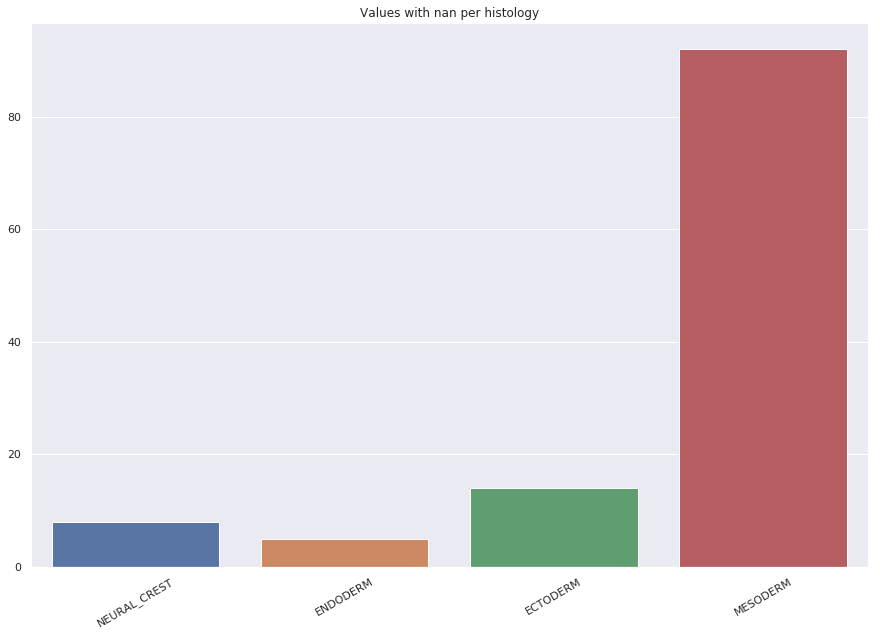

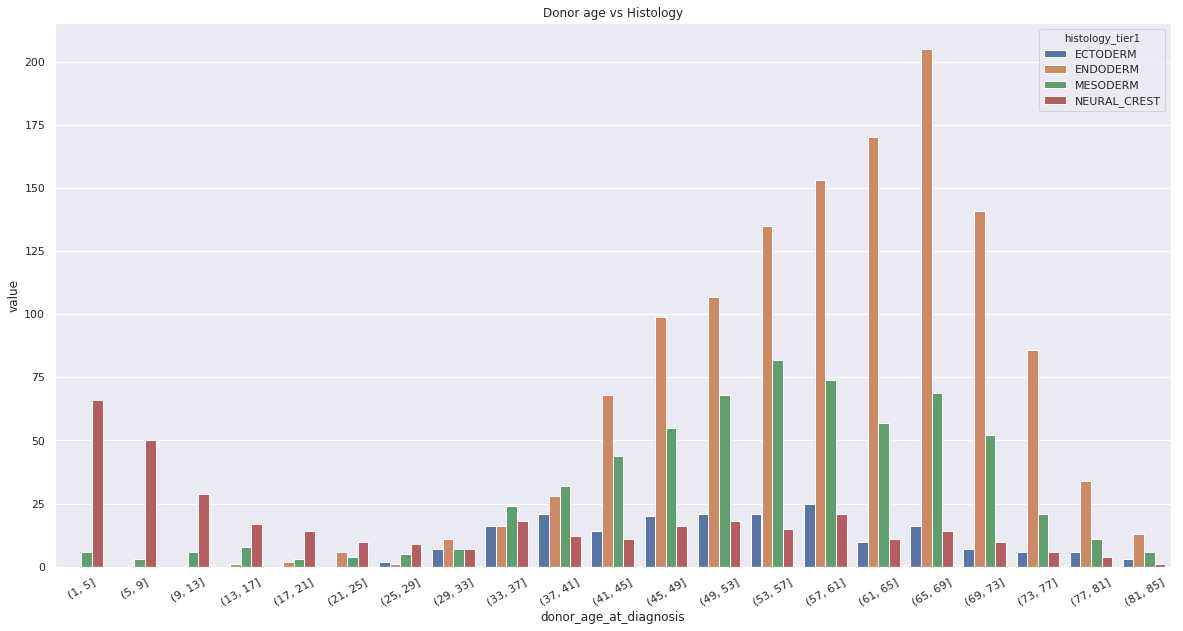

In [19]:
study_donor_age_vs_histology()